In [4]:
import os
from google.cloud import bigquery
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [5]:
class BigQueryDataAnalyzer:
    def __init__(self, credentials_path, project_id, dataset_id):
        os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = credentials_path
        self.client = bigquery.Client()
        self.project_id = project_id
        self.dataset_id = dataset_id

    def fetch_table_info(self, table_id):
        table_ref = self.client.dataset(self.dataset_id).table(table_id)
        table = self.client.get_table(table_ref)
        print(f"Table ID: {table.table_id}")
        print(f"Number of Rows: {table.num_rows}")
        print("Schema:")
        for field in table.schema:
            print(f"  {field.name}: {field.field_type}")

    def fetch_and_plot_balance_histogram(self, table_id, bins=100, num_rows = 100000):
        table_ref = self.client.dataset(self.dataset_id).table(table_id)
        table = self.client.get_table(table_ref)

        columns = ['address', 'balance']
        df = pd.DataFrame(columns=columns)

        rows = self.client.list_rows(table, max_results=num_rows)
        data_to_append = []

        for row in rows:
            new_row = [row['address'], row['balance']]
            data_to_append.append(new_row)

        df = pd.concat([df, pd.DataFrame(data_to_append, columns=columns)], ignore_index=True)

        plt.hist(df['balance'], bins=bins, color='blue', edgecolor='black')
        plt.xlabel('Balance')
        plt.ylabel('Frequency')
        plt.title('Histogram of Balances')
        plt.show()

    def fetch_and_plot_transaction_counts(self, table_id, num_rows = 10000):
        table_ref = self.client.dataset(self.dataset_id).table(table_id)
        table = self.client.get_table(table_ref)

        rows = self.client.list_rows(table, max_results=10000)
        transaction_dates = []

        for row in rows:
            transaction_dates.append(row['block_timestamp'])

        transaction_dates = [date.date() for date in transaction_dates]
        transaction_counts = dict(Counter(transaction_dates))

        df = pd.DataFrame(list(transaction_counts.items()), columns=['Date', 'Transaction Count'])
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values(by='Date')

        plt.figure(figsize=(10, 6))
        plt.bar(df['Date'], df['Transaction Count'], width=0.8, color='skyblue')
        plt.xlabel('Date')
        plt.ylabel('Transaction Count')
        plt.title('Number of Transactions Per Day')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

Table ID: data_mart
Number of Rows: 7105964
Schema:
  address: STRING
  balance: NUMERIC


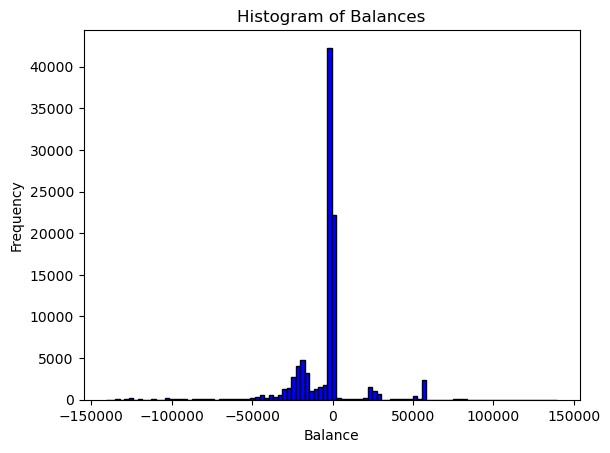

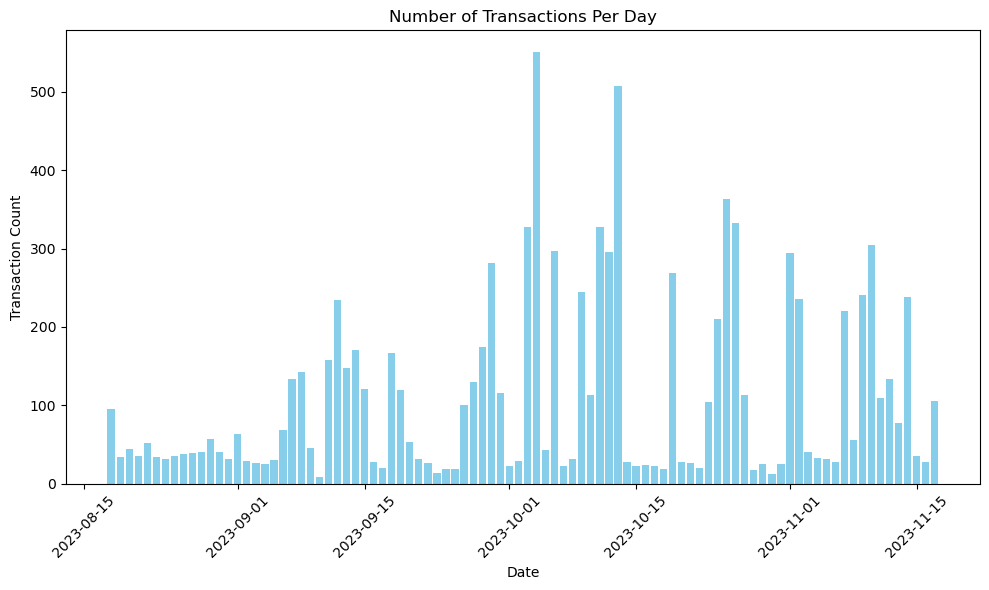

In [6]:
# Initialize the class with project_id, dataset_id, and credentials_path
analyzer = BigQueryDataAnalyzer(
    credentials_path='astrafay-project-bc3a508fb204.json',
    project_id='atrafay-project',
    dataset_id='bitcoin_cash_data'
)

# Fetch and print table information
analyzer.fetch_table_info(table_id='data_mart')

# Fetch and plot balance histogram
analyzer.fetch_and_plot_balance_histogram(table_id='data_mart')

# Fetch and plot transaction counts
analyzer.fetch_and_plot_transaction_counts(table_id='staging_table')